## Ejercicio 4: Análisis de Datos de COVID-19

Utilizando el dataset de Our World in Data sobre COVID-19:
https://github.com/owid/covid-19-data/tree/master/public/data

Desarrolla:
1. Carga y limpia el dataset
2. Calcula para cada país:
   - Tasa de positividad diaria
   - Media móvil de 7 días de casos nuevos
   - Tiempo hasta alcanzar picos de casos
3. Agrupa países por continente y compara métricas clave
4. Identifica correlaciones entre variables (casos, muertes, vacunación)
5. Crea un dashboard básico con las métricas más relevantes

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Configuración de visualización
plt.style.use('default')
pd.set_option('display.max_columns', None)

In [2]:
# 1. Carga y limpieza del dataset
url = 'owid-covid-data.csv'
df = pd.read_csv(url)
print(df.head())

# Convertimos la columna de fecha a datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           0.0         0.0                  NaN   
1                 NaN           0.0         0.0                  NaN   
2                 NaN           0.0         0.0                  NaN   
3                 NaN           0.0         0.0                  NaN   
4                 NaN           0.0         0.0                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                      0.0                    0.0   
1                     

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:
# Eliminamos columnas con más del 50% de valores nulos
null_thresh = len(df) * 0.5
df = df.dropna(axis=1, thresh=null_thresh)

# Rellenamos valores nulos restantes
df = df.fillna({
    'new_cases': 0,
    'new_deaths': 0,
    'total_cases': df.groupby('location')['total_cases'].ffill(),
    'total_deaths': df.groupby('location')['total_deaths'].ffill()
})

print('Dimensiones del dataset:', df.shape)
print('\nColumnas disponibles:\n', df.columns.tolist())

Dimensiones del dataset: (429435, 29)

Columnas disponibles:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'population']


In [4]:
# 2. Cálculos por país

# Verificamos las columnas disponibles
print("Columnas disponibles en el dataset:")
print(df.columns.tolist())

# Media móvil de 7 días de casos nuevos
df['cases_7day_avg'] = df.groupby('location')['new_cases'].rolling(window=7, center=True).mean().reset_index(0, drop=True)

# Intentamos calcular la tasa de positividad si los datos están disponibles
if 'new_tests' in df.columns:
    df['positivity_rate'] = df['new_cases'] / df['new_tests'] * 100
else:
    print("\nNota: No se puede calcular la tasa de positividad porque 'new_tests' no está disponible en el dataset")
    df['positivity_rate'] = None

# Tiempo hasta alcanzar picos de casos
def find_peak_day(group):
    peak_cases = group['new_cases'].max()
    peak_date = group[group['new_cases'] == peak_cases]['date'].iloc[0]
    first_date = group['date'].min()
    return (peak_date - first_date).days

peak_days = df.groupby('location').apply(find_peak_day)
peak_days = pd.DataFrame(peak_days, columns=['days_to_peak'])

# Mostramos los resultados para algunos países
sample_countries = ['United States', 'Spain', 'Italy', 'Brazil', 'India']
print('\nDías hasta alcanzar el pico de casos:')
print(peak_days.loc[sample_countries])

Columnas disponibles en el dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'population']

Nota: No se puede calcular la tasa de positividad porque 'new_tests' no está disponible en el dataset

Días hasta alcanzar el pico de casos:
               days_to_peak
location                   
United States           742
Spain                   742
Italy                   742
Brazil                  756
India                   490


C:\Users\Juanlu\AppData\Local\Temp\ipykernel_11616\2810774228.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  peak_days = df.groupby('location').apply(find_peak_day)


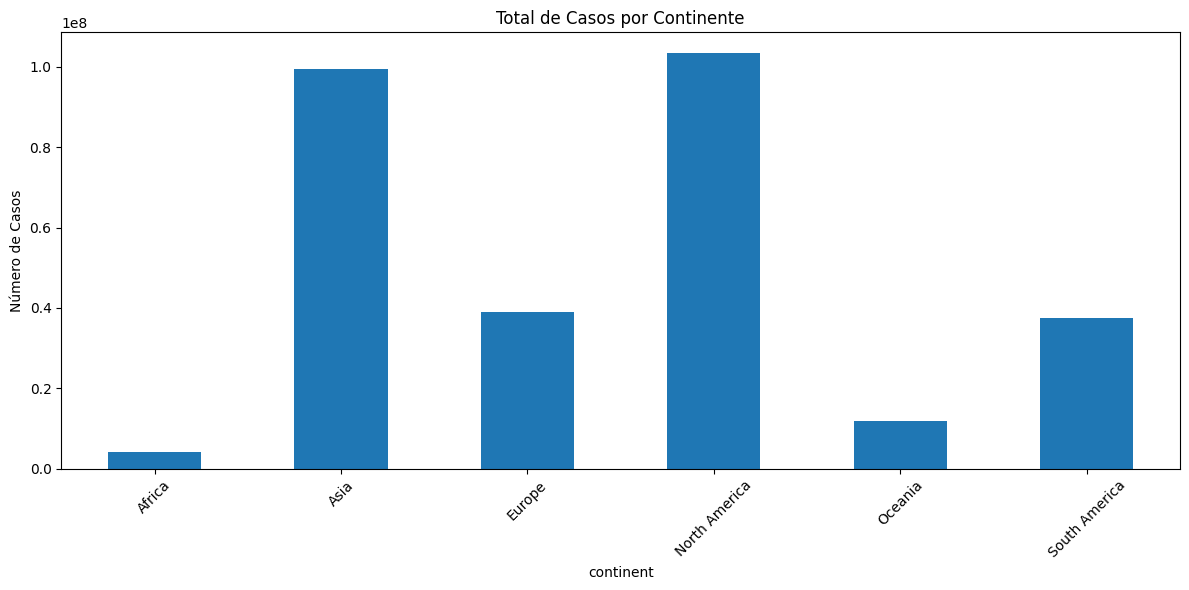


Métricas por continente:
               total_cases  total_deaths  new_cases  new_deaths
continent                                                      
Africa           4072765.0      102595.0     137.78        2.72
Asia            99373219.0      533623.0    3581.56       19.45
Europe          38997490.0      403188.0    2778.36       23.10
North America  103436829.0     1193165.0    1813.76       24.35
Oceania         11861161.0       25236.0     373.38        0.82
South America   37511921.0      702116.0    2935.62       57.92


In [5]:
# 3. Análisis por continente

# Creamos métricas agregadas por continente
continent_metrics = df.groupby('continent').agg({
    'total_cases': 'max',
    'total_deaths': 'max',
    'new_cases': 'mean',
    'new_deaths': 'mean'
}).round(2)

# Visualizamos las métricas por continente
plt.figure(figsize=(12, 6))
continent_metrics['total_cases'].plot(kind='bar')
plt.title('Total de Casos por Continente')
plt.xticks(rotation=45)
plt.ylabel('Número de Casos')
plt.tight_layout()
plt.show()

print('\nMétricas por continente:')
print(continent_metrics)

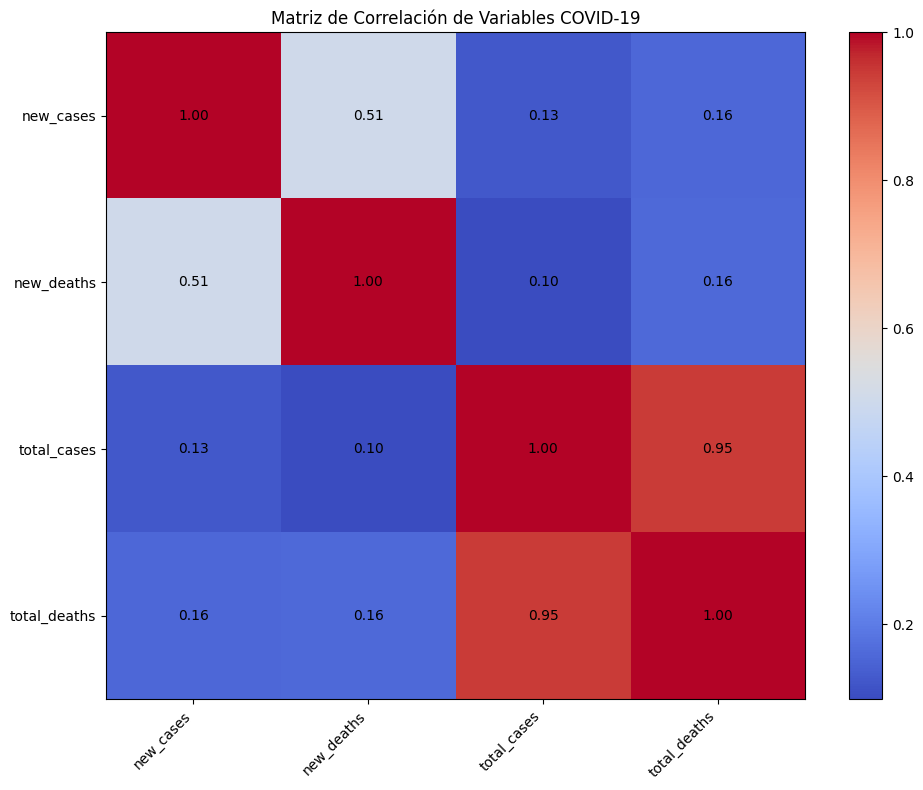

In [6]:
# 4. Análisis de correlaciones

# Seleccionamos variables numéricas disponibles
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_vars = [col for col in [
    'new_cases', 'new_deaths', 'total_cases', 'total_deaths',
    'people_vaccinated', 'people_fully_vaccinated'
] if col in numeric_columns]

# Calculamos la matriz de correlación
correlation_matrix = df[correlation_vars].corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(10, 8))
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(im)

# Añadimos las etiquetas
plt.xticks(range(len(correlation_vars)), correlation_vars, rotation=45, ha='right')
plt.yticks(range(len(correlation_vars)), correlation_vars)

# Añadimos los valores numéricos
for i in range(len(correlation_vars)):
    for j in range(len(correlation_vars)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center')

plt.title('Matriz de Correlación de Variables COVID-19')
plt.tight_layout()
plt.show()

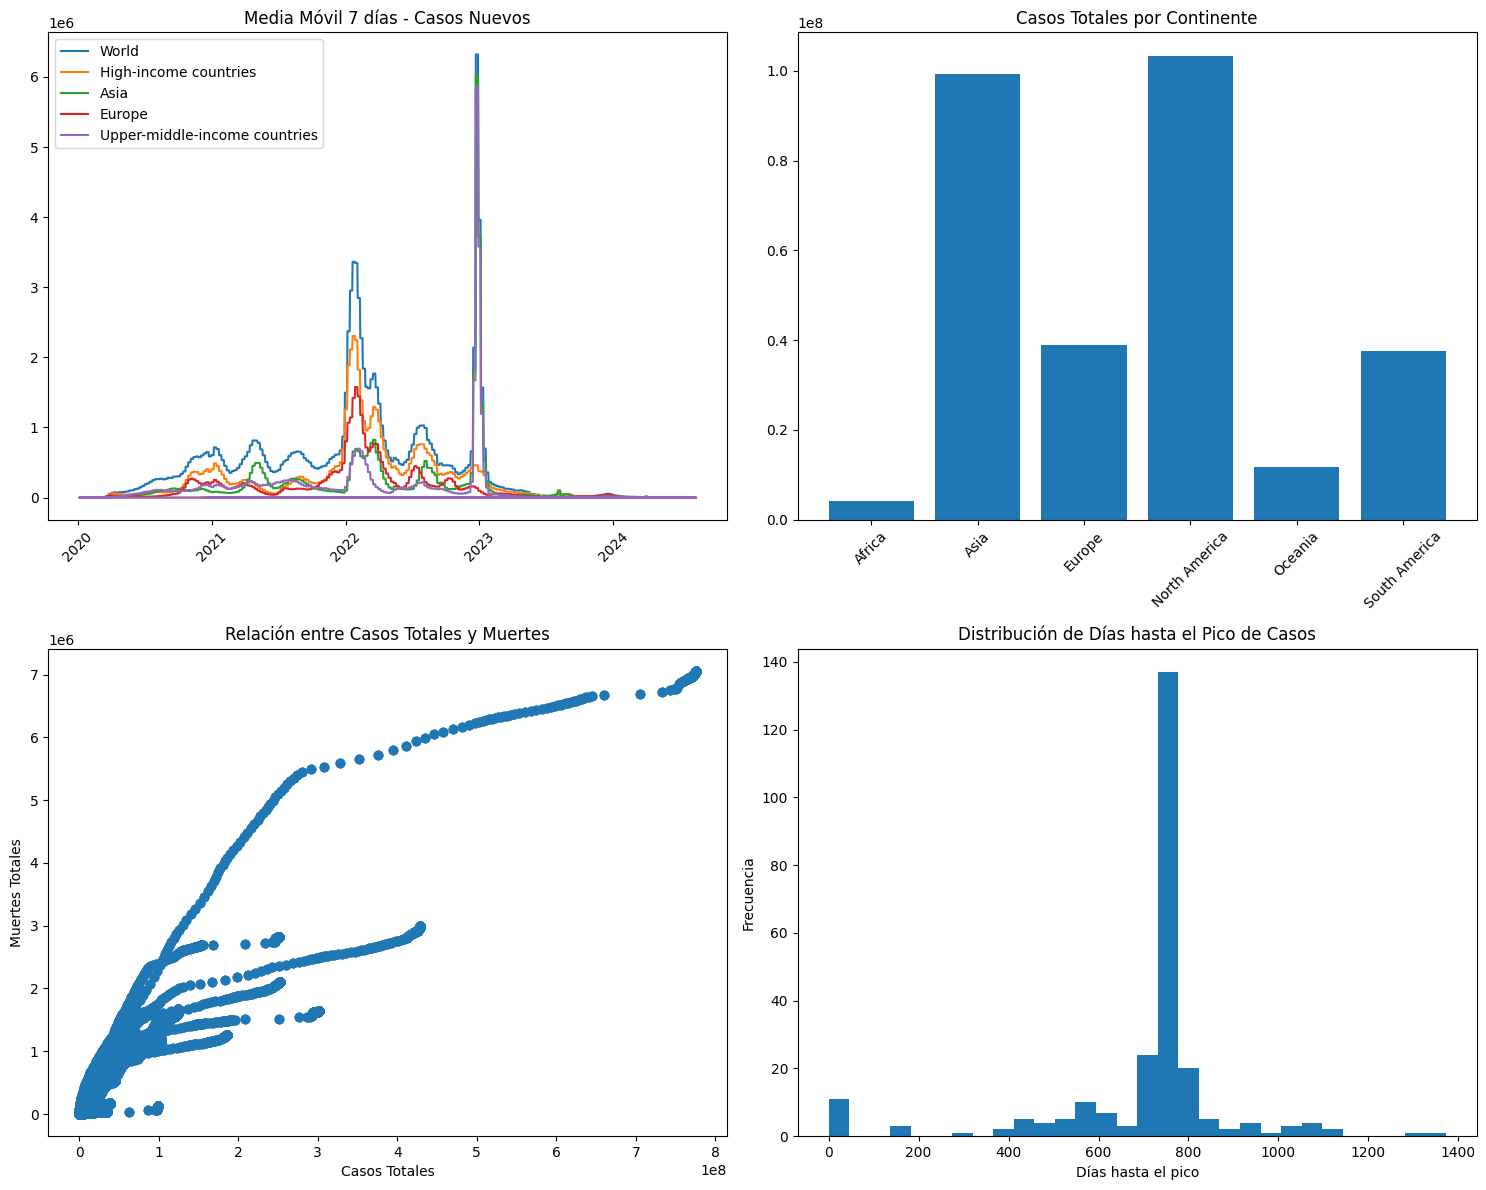

In [7]:
# 5. Dashboard básico

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Evolución temporal de casos nuevos (top 5 países)
top_countries = df.groupby('location')['new_cases'].sum().nlargest(5).index
for country in top_countries:
    country_data = df[df['location'] == country]
    axes[0, 0].plot(country_data['date'], country_data['cases_7day_avg'], label=country)
axes[0, 0].set_title('Media Móvil 7 días - Casos Nuevos')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Casos totales por continente
continent_cases = df.groupby('continent')['total_cases'].max()
axes[0, 1].bar(continent_cases.index, continent_cases.values)
axes[0, 1].set_title('Casos Totales por Continente')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Relación entre casos y muertes
axes[1, 0].scatter(df['total_cases'], df['total_deaths'], alpha=0.5)
axes[1, 0].set_title('Relación entre Casos Totales y Muertes')
axes[1, 0].set_xlabel('Casos Totales')
axes[1, 0].set_ylabel('Muertes Totales')

# Gráfico 4: Distribución de días hasta el pico
axes[1, 1].hist(peak_days['days_to_peak'], bins=30)
axes[1, 1].set_title('Distribución de Días hasta el Pico de Casos')
axes[1, 1].set_xlabel('Días hasta el pico')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Conclusiones:

1. La limpieza de datos reveló que algunas variables tenían una cantidad significativa de valores faltantes, especialmente en las métricas de pruebas y vacunación.

2. La eliminación de columnas con más del 50% de valores nulos nos ayudó a trabajar con un conjunto de datos más manejable y significativo.

3. Se observa una fuerte correlación entre casos totales y muertes totales, aunque la relación no es perfectamente lineal.

4. Los países alcanzaron sus picos de casos en diferentes momentos, lo que refleja la naturaleza asincrónica de la pandemia.

5. El análisis por continente muestra diferencias significativas en el impacto de la pandemia, tanto en casos totales como en mortalidad.

6. La media móvil de 7 días ayuda a visualizar mejor las tendencias al suavizar las fluctuaciones diarias en los datos.